In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [62]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [63]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18575,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
import matplotlib.pyplot as plt

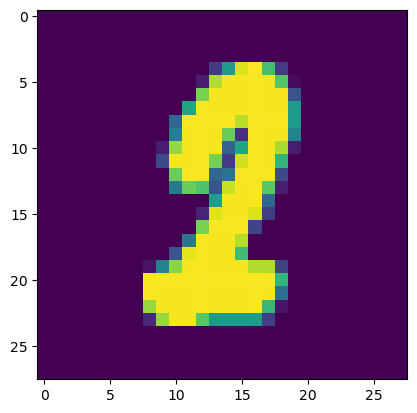

In [66]:
plt.imshow(df.iloc[21601,1:].values.reshape(28,28))

In [67]:
## Without PCA

In [68]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [69]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
X_train.shape

(33600, 784)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
import time
start_time = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start_time)

13.705589056015015


In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [76]:
## Using PCA

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [80]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [81]:
X_train_trf.shape

(33600, 100)

In [82]:
knn = KNeighborsClassifier()

In [83]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [84]:
y_pred = knn.predict(X_test_trf)

In [85]:
accuracy_score(y_test,y_pred)

0.9535714285714286

In [101]:
for i in range(1,200):
    pca = PCA(n_components=None)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
print(accuracy_score(y_test,y_pred))

KeyboardInterrupt: 

In [88]:
## transforming to a 2D cordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [89]:
X_train_trf

array([[-2.71865526, -0.4895967 ],
       [-0.67701162, -6.75419579],
       [-3.03323347,  6.50942132],
       ...,
       [ 2.14885098,  0.78080454],
       [ 1.05955712,  0.94807622],
       [17.7025823 ,  1.96208085]])

In [96]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y=X_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [93]:
##transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [94]:
X_train_trf

array([[-2.71866735, -0.48988769,  1.13620448],
       [-0.67690978, -6.75352827, -2.33928991],
       [-3.03321378,  6.51001762,  7.49215693],
       ...,
       [ 2.14885596,  0.78091545, -0.74764321],
       [ 1.05950466,  0.94724898,  3.95111898],
       [17.70256325,  1.96184031, -4.94414543]])

In [95]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],
                y=X_train_trf[:,1],
                z=X_train_trf[:,2],
                color=y_train_trf
                )
fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

In [97]:
# Eigen values
pca.explained_variance_

array([40.67111197, 29.1702339 , 26.74459469])

In [98]:
#Eigen vectors 
pca.components_.shape

(3, 784)

In [100]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [117]:
pca = PCA(n_components=None)

In [118]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [121]:
X_train_trf

array([[-2.71863253e+00, -4.89824095e-01,  1.13549660e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.76980150e-01, -6.75362491e+00, -2.33590139e+00, ...,
        -1.02645432e-15, -4.04270297e-15,  3.78140662e-16],
       [-3.03323281e+00,  6.50981624e+00,  7.49182983e+00, ...,
        -1.93333248e-15, -1.53885945e-15, -3.37276444e-16],
       ...,
       [ 2.14883643e+00,  7.80794439e-01, -7.47387739e-01, ...,
         1.34879501e-18, -3.69966522e-17, -5.52748824e-18],
       [ 1.05957006e+00,  9.47673116e-01,  3.94973114e+00, ...,
        -2.41037313e-18, -3.52877967e-17, -2.36121366e-18],
       [ 1.77025845e+01,  1.96188185e+00, -4.94352837e+00, ...,
         2.57654234e-17, -1.26199362e-17,  4.26254367e-18]])

In [122]:
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [123]:
pca.components_.shape

(784, 784)

In [124]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

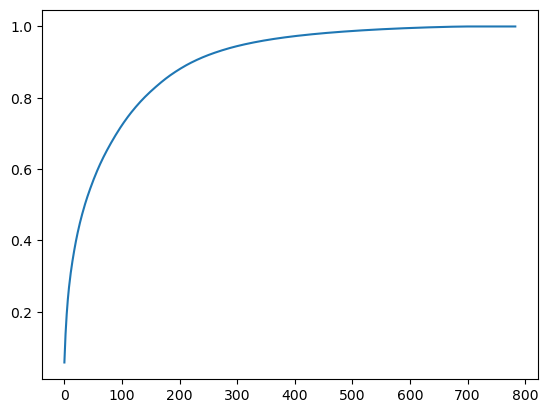

In [125]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))